## LSI31008 Elements of Bioinformatics, Assignment 2:  Basic sequence statistics, the genetic code and transcription factor binding sites.


Here we will explore the (near) universal genetic code discussed at the lecture. We first load in yeast *S.cerevisiae* coding sequence downloaded from [SGD](https://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/). The idea is to evaluate various statistics from the genomic data and think about them in the light of the genetic code. For background reading please have a look of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899) and ["EV Koonin, AS Novozhilov: Origin and evolution of the genetic code: The universal enigma"](https://iubmb.onlinelibrary.wiley.com/doi/abs/10.1002/iub.146).

The Biopython package offers easy ways to read in FASTA-files and to handle sequences. To install it on the CSC Jupyter environment you need to run the following commands: (Note: you might need to run this separately and then restart this notebook to ensure that the package is available to your session)

In [1]:
import sys
!{sys.executable} -m pip install --user biopython

Import pyplot for figure generation

In [2]:
from matplotlib import pyplot as plt

Import also Counter and OrderedDict, for subsequent usage

In [3]:
from collections import Counter, OrderedDict

Import Biopython SeqIO for reading FASTA-files

In [4]:
from Bio import SeqIO

Read the file into a dictionary of SeqRecord objects

Please see the following links for information on using Biopython sequence tools:

https://biopython.org/wiki/SeqIO

https://biopython.org/wiki/SeqRecord

https://biopython.org/wiki/Seq

In [5]:
input_file = 'orf_coding.fasta'
records = SeqIO.to_dict(SeqIO.parse(input_file, "fasta"))

See that we have 5917 keys:

In [6]:
ids = list(records.keys())
len(ids)

5917

A single record in the dictionary contains all kinds of data:

In [7]:
records[ids[2]]

#print(records)

SeqRecord(seq=Seq('ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAAACGCTTCT...TAA'), id='YAL003W', name='YAL003W', description='YAL003W EFB1 SGDID:S000000003, Chr I from 142174-142253,142620-143160, Genome Release 64-2-1, intron sequence removed, Verified ORF, "Translation elongation factor 1 beta; stimulates nucleotide exchange to regenerate EF-1 alpha-GTP for the next elongation cycle; part of the EF-1 complex, which facilitates binding of aminoacyl-tRNA to the ribosomal A site"', dbxrefs=[])

To get the nucleotide sequence out use `.seq`

In [8]:
sequence = (records[ids[0]]).seq
str(sequence)

'ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATTGCTTCAAATAAGGGAAAAATCACTTTGAATCAGCTGTGGGATATATCTGGTAAATATTTTGATTTGTCTGATAAAAAAGTTAAACAGTTCGTGCTTTCATGCGTGATATTGAAAAAGGACATTGAGGTGTATTGTGATGGTGCTATAACAACTAAAAATGTGACTGATATTATAGGCGACGCTAATCATTCATACTCGGTTGGGATTACTGAGGACAGCCTATGGACATTATTAACGGGATACACAAAAAAGGAGTCAACTATTGGAAATTCTGCATTTGAACTACTTCTCGAAGTTGCCAAATCAGGAGAAAAAGGGATCAATACTATGGATTTGGCGCAGGTAACTGGGCAAGATCCTAGAAGTGTGACTGGACGTATCAAGAAAATAAACCACCTGTTAACAAGTTCACAACTGATTTATAAGGGACACGTCGTGAAGCAATTGAAGCTAAAAAAATTCAGCCATGACGGGGTGGATAGTAATCCCTATATTAATATTAGGGATCATTTAGCAACAATAGTTGAGGTGGTAAAACGATCAAAAAATGGTATTCGCCAGATAATTGATTTAAAGCGTGAATTGAAATTTGACAAAGAGAAAAGACTTTCTAAAGCTTTTATTGCAGCTATTGCATGGTTAGATGAAAAGGAGTACTTAAAGAAAGTGCTTGTAGTATCACCCAAGAATCCTGCCATTAAAATCAGATGTGTAAAATACGTGAAAGATATTCCAGACTCTAAAGGCTCGCCTTCATTTGAGTATGATAGCAATAGCGCGGATGAAGATTCTGTATCAGATAGCAAGGCAGCTTTCGAAGATGAAGACTTAGTCGAAGGTTTAGATAATTTCAATGCGACTGATTTATTACAAAATCAAGGCCTTGTTATGGAAGAGAAAGAGGATGCTGTAAAGAATGAAGTTCTTCTTAATCGATTTTATCCA

Or `.translate()` for amino acid sequence: (Note: you may need to write your own translation method for some Problems)

In [9]:
str(sequence.translate())

'MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVILKKDIEVYCDGAITTKNVTDIIGDANHSYSVGITEDSLWTLLTGYTKKESTIGNSAFELLLEVAKSGEKGINTMDLAQVTGQDPRSVTGRIKKINHLLTSSQLIYKGHVVKQLKLKKFSHDGVDSNPYINIRDHLATIVEVVKRSKNGIRQIIDLKRELKFDKEKRLSKAFIAAIAWLDEKEYLKKVLVVSPKNPAIKIRCVKYVKDIPDSKGSPSFEYDSNSADEDSVSDSKAAFEDEDLVEGLDNFNATDLLQNQGLVMEEKEDAVKNEVLLNRFYPLQNQTYDIADKSGLKGISTMDVVNRITGKEFQRAFTKSSEYYLESVDKQKENTGGYRLFRIYDFEGKKKFFRLFTAQNFQKLTNAEDEISVPKGFDELGKSRTDLKTLNEDNFVALNNTVRFTTDSDGQDIFFWHGELKIPPNSKKTPNKNKRKRQVKNSTNASVAGNISNPKRIKLEQHVSTAQEPKSAEDSPSSNGGTVVKGKVVNFGGFSARSLRSLQRQRAILKVMNTIGGVAYLREQFYESVSKYMGSTTTLDKKTVRGDVDLMVESEKLGARTEPVSGRKIIFLPTVGEDAIQRYILKEKDSKKATFTDVIHDTEIYFFDQTEKNRFHRGKKSVERIRKFQNRQKNAKIKASDDAISKKSTSVNVSDGKIKRRDKKVSAGRTTVVVENTKEDKTVYHAGTKDGVQALIRAVVVTKSIKNEIMWDKITKLFPNNSLDNLKKKWTARRVRMGHSGWRAYVDKWKKMLVLAIKSEKISLRDVEELDLIKLLDIWTSFDEKEIKRPLFLYKNYEENRKKFTLVRDDTLTHSGNDLAMSSMIQREISSLKKTYTRKISASTKDLSKSQSDDYIRTVIRSILIESPSTTRNEIEALKNVGNESIDNVIMDMAKEKQIYLHGSKLECTDTLPDILENRGNYKDFGVAFQYRCKVNELLEAGNAIVIN

The following function reads a string by triplets, counts the occurrence of each triplet and returns a dictionary:

In [10]:
def extract_triplets(s):
    size = len(s) // 3
    out = {}
    for i in range(size):
        start = i*3
        end = start + 3
        triplet = s[start:end]
        if triplet in out:
            out[triplet] += 1
        else:
            out[triplet] = 1
    return(out)

sekvenssi = "AAGCCT"
extract_triplets(sekvenssi)

{'AAG': 1, 'CCT': 1}

Testing that it works:

In [11]:
testi = extract_triplets(str(sequence))
print(testi)
#print(testi['AAA'])
print(sum(testi.values()))
#testi['ACC']


{'ATG': 17, 'GTA': 22, 'CTG': 12, 'ACG': 11, 'ATT': 41, 'TAT': 24, 'CCT': 9, 'GAC': 21, 'GAA': 51, 'CTC': 8, 'CAA': 19, 'ATA': 31, 'GTG': 19, 'TCT': 32, 'GAT': 58, 'AAA': 81, 'GCT': 23, 'TCA': 24, 'AAT': 44, 'AAG': 44, 'GGA': 22, 'ATC': 15, 'ACT': 36, 'TTG': 20, 'CAG': 18, 'TGG': 15, 'GGT': 13, 'TTT': 32, 'GTT': 32, 'TTC': 10, 'CTT': 17, 'TGC': 2, 'GAG': 22, 'TGT': 5, 'ACA': 22, 'GGC': 15, 'CAT': 12, 'TAC': 11, 'TCG': 8, 'GGG': 9, 'AGC': 11, 'CTA': 11, 'TTA': 29, 'GCA': 15, 'GCC': 9, 'GCG': 5, 'AGA': 24, 'AGT': 15, 'CGT': 9, 'AAC': 22, 'CAC': 4, 'GTC': 14, 'CCC': 6, 'AGG': 16, 'CGA': 7, 'CGC': 5, 'CCA': 11, 'ACC': 6, 'TCC': 7, 'CCG': 4, 'CGG': 3, 'TAA': 1}
1161


The following dictionary may be useful for translating triplets into amino acids: (Note: please check that this is done right)

In [12]:
transl = {'AAA' : 'Lys', 'AAC' : 'Asn', 'AAG' : 'Lys', 'AAT' : 'Asn',
     'ACA' : 'Thr', 'ACC' : 'Thr', 'ACG' : 'Thr', 'ACT' : 'Thr',
     'AGA' : 'Arg', 'AGC' : 'Ser', 'AGG' : 'Arg', 'AGT' : 'Ser',
     'ATA' : 'Ile', 'ATC' : 'Ile', 'ATG' : 'Met', 'ATT' : 'Ile',
     'CAA' : 'Gln', 'CAC' : 'His', 'CAG' : 'Gln', 'CAT' : 'His',
     'CCA' : 'Pro', 'CCC' : 'Pro', 'CCG' : 'Pro', 'CCT' : 'Pro',
     'CGA' : 'Arg', 'CGC' : 'Arg', 'CGG' : 'Arg', 'CGT' : 'Arg',
     'CTA' : 'Leu', 'CTC' : 'Leu', 'CTG' : 'Leu', 'CTT' : 'Leu',
     'GAA' : 'Glu', 'GAC' : 'Asp', 'GAG' : 'Glu', 'GAT' : 'Asp',
     'GCA' : 'Ala', 'GCC' : 'Ala', 'GCG' : 'Ala', 'GCT' : 'Ala',
     'GGA' : 'Gly', 'GGC' : 'Gly', 'GGG' : 'Gly', 'GGT' : 'Gly',
     'GTA' : 'Val', 'GTC' : 'Val', 'GTG' : 'Val', 'GTT' : 'Val',
     'TAA' : 'Stop', 'TAC' : 'Tyr', 'TAG' : 'Stop', 'TAT' : 'Tyr',
     'TCA' : 'Ser', 'TCC' : 'Ser', 'TCG' : 'Ser', 'TCT' : 'Ser',
     'TGA' : 'Stop', 'TGC' : 'Cys', 'TGG' : 'Trp', 'TGT' : 'Cys',
     'TTA' : 'Leu', 'TTC' : 'Phe', 'TTG' : 'Leu', 'TTT' : 'Phe'};

In [13]:
transl['AAA']


'Lys'

##  Problem 1a
Evaluate what is the fraction of nucleotides 'A', 'C', 'G' and 'T' in the coding sequence of *S.cer*.

In [14]:
#iterating through a Counter object is like any dictionary
#for nucleotide, count in Counter(sequence).items():
    #print(nucleotide, ":", count)
nucleotide_amount_dictionary = {'A': 0 ,'C': 0, 'G': 0, 'T':0}
for i in records.keys():
    seq = records[i].seq
    for nucleotide, count in Counter(seq).items():
        nucleotide_amount_dictionary[nucleotide] +=count

print(nucleotide_amount_dictionary)
summ = 0    
for nucleotide, amount in nucleotide_amount_dictionary.items():
    summ+=amount
#print(summ)
fractions = {}
for nucleotide, amount in nucleotide_amount_dictionary.items():
    fractions[nucleotide] ="{:.2f}".format(amount/summ)
    
print(fractions)

{'A': 2883611, 'C': 1683047, 'G': 1795281, 'T': 2426618}
{'A': '0.33', 'C': '0.19', 'G': '0.20', 'T': '0.28'}


**Hint :** You can use the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) from the code above to get the number of occurrences of every nucleotide.

##  Problem 1b
Translate the coding sequences to protein sequence. Make a barchart showing the numbers of each amino-acid and stop codon, order by prevalence. 

In [15]:
# the following code sorts a dictionary in descending order
OrderedDict(Counter(sequence).most_common())

OrderedDict([('A', 1238), ('T', 952), ('G', 744), ('C', 549)])

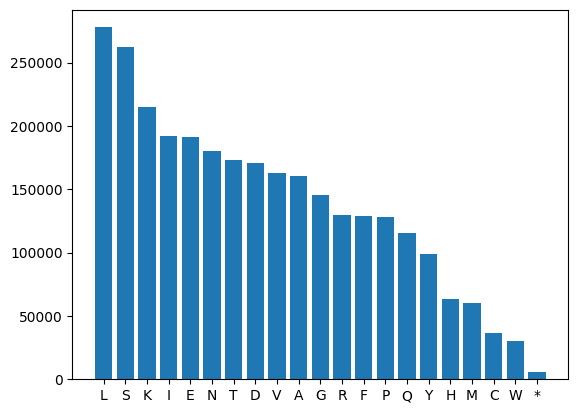

In [16]:
protein_sequence_counts = {}
protein_sequence=""
for i in range(len(records)):
    seq = records[ids[i]].seq
    #adding protein to one string variable
    protein_sequence += str(seq.translate())

#using Counter() to calculate prevalence of each amino acid and order dict
# to order amino acids       
c = OrderedDict(Counter(protein_sequence).most_common())


plt.bar(range(len(c)), list(c.values()), align = 'center')

plt.xticks(range(len(c)), list(c.keys()))

plt.show()



**Hint :** You can use the [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) from the code above, together with the `.most_common()` method to sort the elements of a `Counter` object.

##  Problem 1c
Split each coding sequences to codons (triplet that do not overlap). Make a barchart showing the numbers of each codon (64 altogether) order by the most often used amino-acid and its most often used codon, its second most used codon etc. (label the chart by both the codon and its amino-acid).  

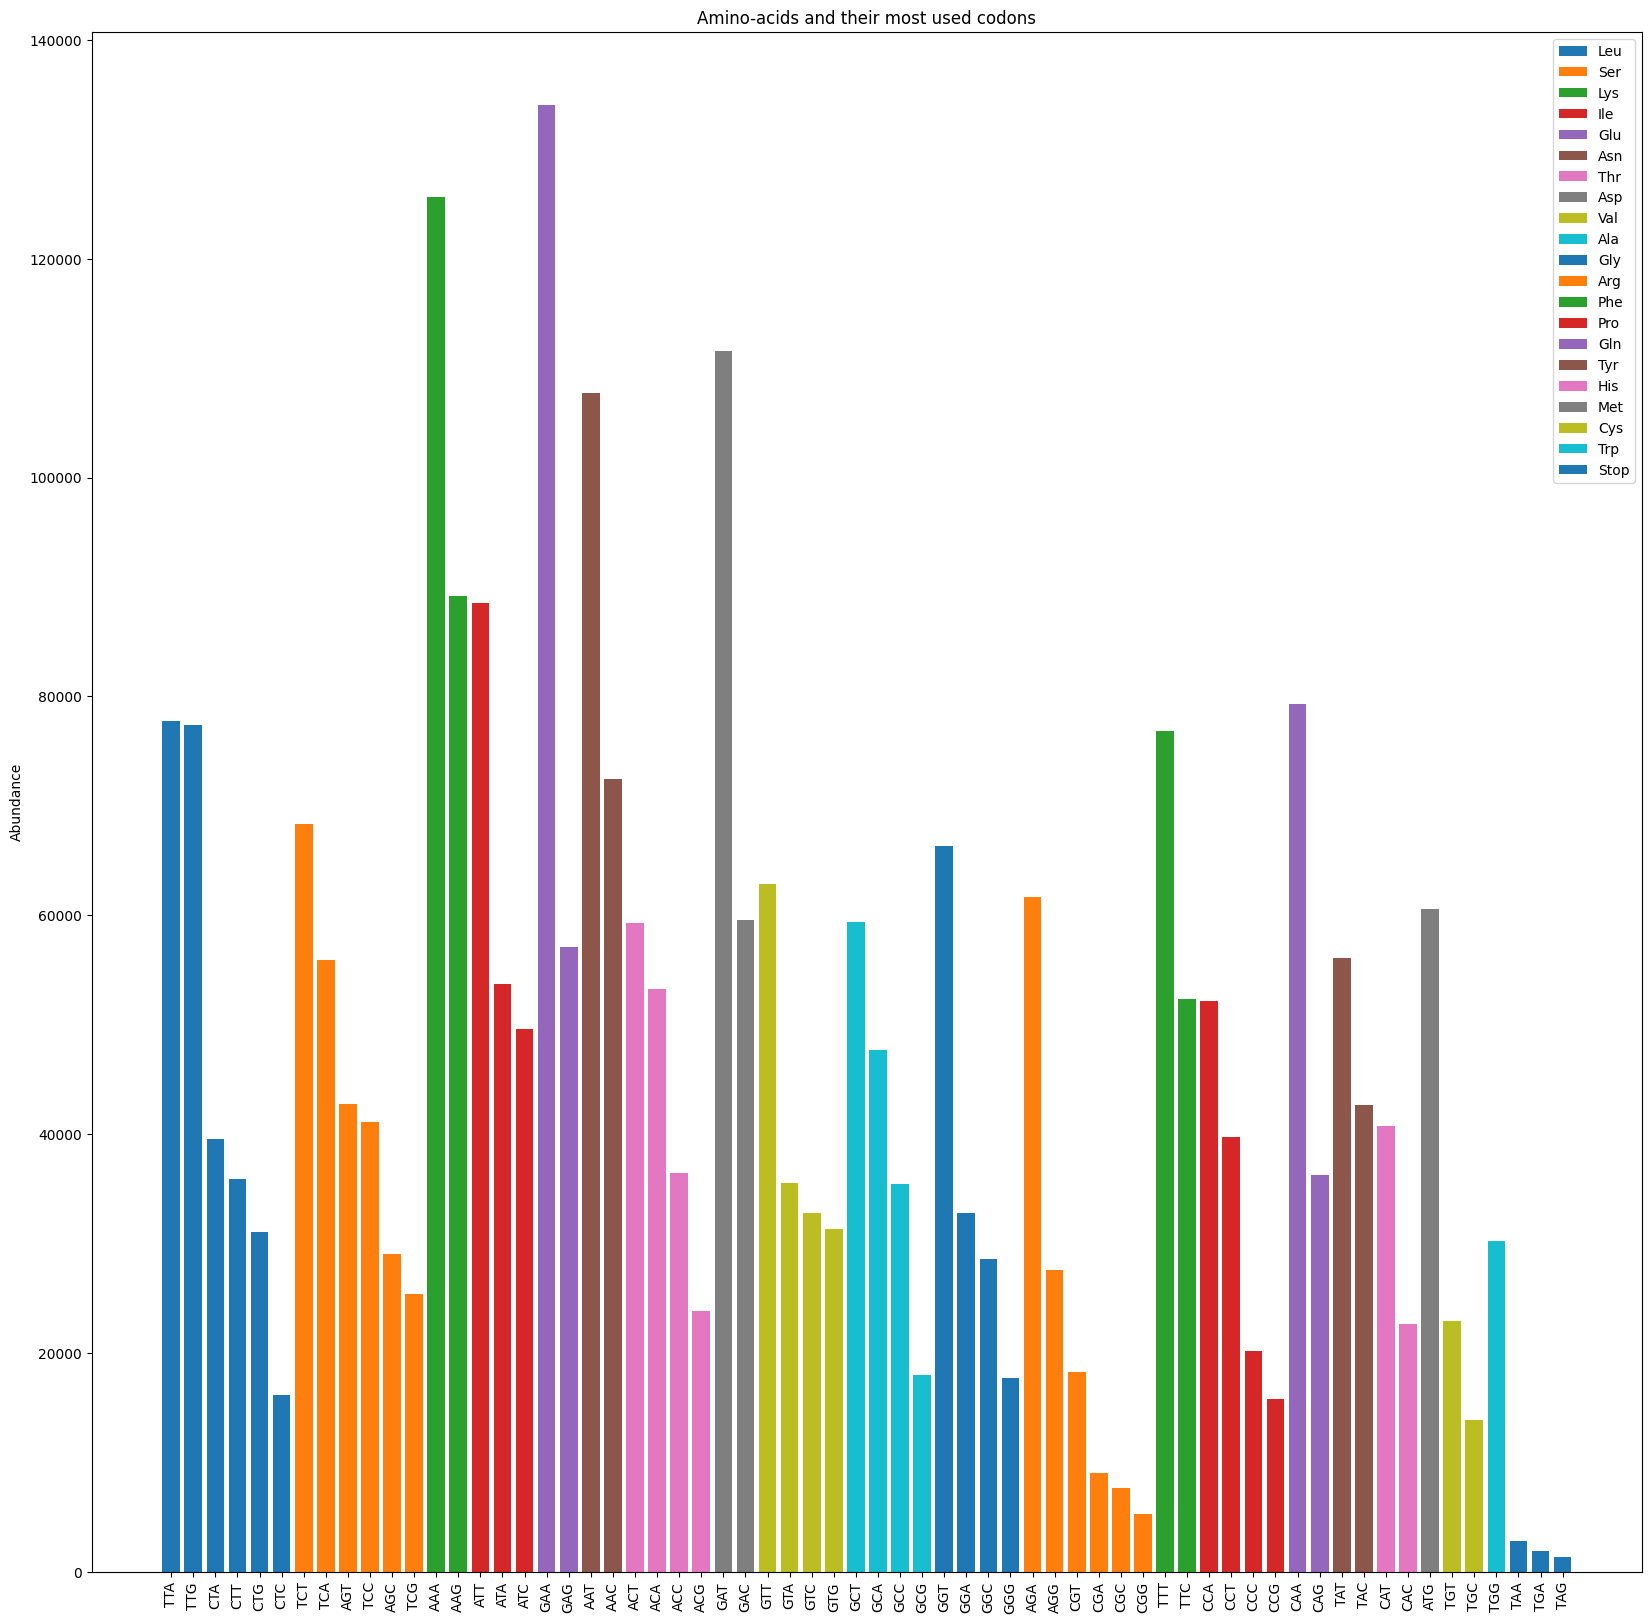

In [18]:
#creating a new dictionary to save data 
results = {}


for i in records.keys():
    #accessing records key values = sequence data
    seq = records[i].seq
    #changing sequence data to codons
    codons = extract_triplets(str(seq)) #this return the codons and its counts as a dictionary
    for codon, amount in codons.items():
        amino_acid = transl[codon] #changin the codon into it's aminoacid
        if amino_acid in results: # checking if the aminoacid is already at the result dictionary
            if codon in results[amino_acid].keys(): #checking if the codon is 
                results[amino_acid][codon] += amount
            else:
                results[amino_acid][codon] = amount
        else:
            results[amino_acid] = {codon : amount}
#results[]
            
            
#sorting by the total abundance of amino acid
results = dict(sorted(results.items(), key=lambda k: sum(k[1].values()), reverse = True))
            


#orderin the dictionary in the reverse order by its codons 
for i in results:
    results[i] = dict(sorted(results[i].items(), key=lambda item: item[1], reverse = True))



#plotting the ordered dictionary: 
_, axes = plt.subplots(figsize = (20, 20))
for protein, count in results.items():
    bars = axes.bar(
        x = list(count.keys()),
        height = count.values(),
        label = protein
             )

# changing the axes properties
axes.set_ylabel("Abundance")
axes.set_title("Amino-acids and their most used codons");

for tick in axes.get_xticklabels():
    tick.set_rotation(90)
# setting the acid values 
axes.legend()

plt.show()


SOME TESTING TO MAKE SURE THE PLOT IS ACTUALLY CORRECT: 

In [18]:
codons = extract_triplets(str(seq))

In [32]:
print(results)

{'Leu': {'TTA': 77784, 'TTG': 77414, 'CTA': 39538, 'CTT': 35882, 'CTG': 31106, 'CTC': 16142}, 'Ser': {'TCT': 68369, 'TCA': 55887, 'AGT': 42777, 'TCC': 41090, 'AGC': 29098, 'TCG': 25445}, 'Lys': {'AAA': 125652, 'AAG': 89194}, 'Ile': {'ATT': 88582, 'ATA': 53695, 'ATC': 49663}, 'Glu': {'GAA': 134014, 'GAG': 57143}, 'Asn': {'AAT': 107705, 'AAC': 72466}, 'Thr': {'ACT': 59270, 'ACA': 53310, 'ACC': 36486, 'ACG': 23830}, 'Asp': {'GAT': 111525, 'GAC': 59560}, 'Val': {'GTT': 62874, 'GTA': 35512, 'GTC': 32828, 'GTG': 31333}, 'Ala': {'GCT': 59428, 'GCA': 47674, 'GCC': 35468, 'GCG': 18034}, 'Gly': {'GGT': 66314, 'GGA': 32796, 'GGC': 28592, 'GGG': 17723}, 'Arg': {'AGA': 61678, 'AGG': 27628, 'CGT': 18306, 'CGA': 9067, 'CGC': 7675, 'CGG': 5318}, 'Phe': {'TTT': 76812, 'TTC': 52331}, 'Pro': {'CCA': 52147, 'CCT': 39795, 'CCC': 20191, 'CCG': 15844}, 'Gln': {'CAA': 79320, 'CAG': 36304}, 'Tyr': {'TAT': 56127, 'TAC': 42673}, 'His': {'CAT': 40739, 'CAC': 22635}, 'Met': {'ATG': 60584}, 'Cys': {'TGT': 22959, 'T

In [42]:
a =results['Leu']
print(a)
summ = 0
for i in a.values():
    summ+=i
    
print(summ)

{'TTA': 77784, 'TTG': 77414, 'CTA': 39538, 'CTT': 35882, 'CTG': 31106, 'CTC': 16142}
277866


##  Problem 1d
From the codon frequency data, focus your attention to codons that code for the same amino-acid. Just by looking can you identify big differences in the particular codons that are being used to make a particular amino-acid? (Hint, look at Figure 1 of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899)). 

**ANSWER:** <br> Codon bias means that eventhoug more than one codon encodes for one amino acid, some codons are preferred over others. 
In our example data: <br>
For the three different 'Stop' codon the difference between their usage is very small compared to Arginine where the difference between 'AGA' and 'CGG' is enourmous. It also seems with all amino acids that the kodons that have alot C and G in it are used less. Maybe this is due to some biochemical / biophysical aspect of energy ? <br>
Also notably within the same amino acid the used codons seem to differ only by the last nucleotide for example with Leusine.  
Unofortunately, this is not true to all of the amino acids here. 

##  Problem 2: Binding energy statistics in the yeast genome (intergenic regions) 

Here we analyse signatures of selection from genomic data using transcription factor binding sites as an example. See e.g. ["Kinney JB, Tkacik G, Callan CG (2007) Precise physical models of protein-DNA interaction from high-throughput data. Proc Natl Acad Sci USA 104(2):501–506"](http://www.pnas.org/content/104/2/501.short) and ["Mustonen V, Kinney J, Callan CG, Lässig M (2008) Energy-dependent fitness: a quantitative model for the evolution of yeast transcription factor binding sites. Proc Natl Acad Sci USA 105(34):12376–12381"](http://www.pnas.org/content/105/34/12376.short). 

Directory `data/` contains a file `alignment.txt.NaN.removed` where intergenic sequences for four yeast species (*S.cer, S.par, S.mik, S.bay*) are given. Note we have removed insertions and deletions from the alignment so that analyses which in this assignment focus on a single species aspects are a bit simpler.

In [19]:
#from setup import *
#%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#import data to a dataframe
import numpy as np
#!pip install pandas

import pandas as pd

datafile="alignment.txt.NaN.removed";
seq_igs=pd.read_csv(datafile,sep="\s+");
tfBindingFile="Emat.abf1.kinney";
# imports an energy matrix modelling transcription factor to DNA binding for factor Abf1
# the dimensions are 4 x 20, correspoding to the four nucleotides A,C,G,T and the binding sites motif length 20
# smaller energy values indicate better binding
Emat=np.array(pd.read_csv(tfBindingFile,header=None,sep="\s+"))
#print(Emat.shape)
#print(Emat)



In [21]:
def getEnergy(seq,Emat):
    #first replacing from the given sequence every nucleotide with number and returning it as a list s1
    s1=list(seq.replace('A','0').replace('C','1').replace('G','2').replace('T','3').replace('N','4'))
    #next line get's the number of rows of the given in Emat.  
    Lmat=Emat.shape[1]
    Lseq=len(s1) #saves to 'Lseq' the lenght of the given sequence 
    
    Ev=[] #creating an empty list Ev where we are next adding the values 
    for i in range(0,Lseq-Lmat+1): #looping through numbers from 0 to the length of the sequence - length matrix (rows ) + 1
        #setting all the value to 0 
        E=0.0;
        k=0; #k for columns ? 
        flag=0;
        eps=0.0;
        for j in range(i,i+Lmat): #looping through from i to i+ length of the matrix rows 
            nuc=int(s1[j]) #nuc = number on the list 's1' in the index j 
            if nuc < 4: # if the nuc is in the range below 4 
                eps=Emat[nuc,k]; #getting the value from the energy matrix that accounts for the nucleotide
                                 #and k so which column are we looking at 
            else:
                #else statement accounts for N values so possible missing values in the data      
                flag=1;
            E+=eps #adding the eps value (=the value for nucleotide from
                    #the energy matrix) to E 
            k+=1; #moving on to next column 
        if flag==0: #only if no missing values we can append to the list   
            Ev.append(E)
    return Ev #returning the created table with calculated values

In [22]:
import random
def randomise(seq):
    #first replacing every nucleotide with corresponding number A = 0, C = 1, G = 2, T = 3 and missing values N =4 
    s1=list(seq.replace('A','0').replace('C','1').replace('G','2').replace('T','3').replace('N','4'))
    #then arranging the numbers randomly
    random.shuffle(s1)
    return "".join(s1) #joining the numbers from the list together without anything between them 

In [23]:
sequence = (records[ids[0]]).seq
a = getEnergy(sequence,Emat)
print(a[0])

3.1668816996605003


#### Problem 2a: 
Visualise the binding energy matrix *Emat* with elements $\epsilon_k(a)$ where $k$ denotes column (binding site position) and $a \in{A,C,G,T}$ nucleotides. <br>What is the best possible binding sequence according to this model?

best possible binding sequence: AATGTCACTTTGTACGACGC


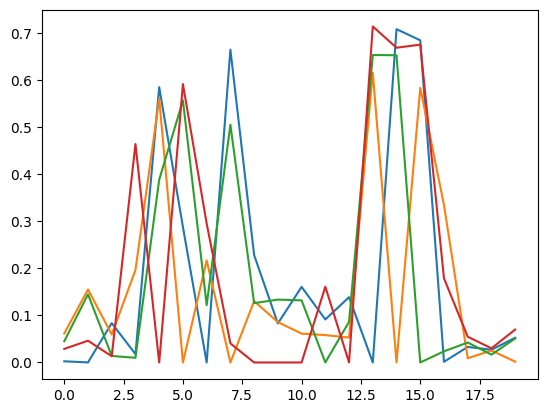

In [24]:
Emat=np.array(pd.read_csv(tfBindingFile,header=None,sep="\s+"))
for i in range(4):
    plt.plot(Emat[i,])
    #print(Emat[i,])
    
best_seq = ""
for i in range(Emat.shape[1]):
    a = np.argmin(Emat[:,i]) #the smallest value from a column is the best binding energy and a
    #is then the row which gives us the info which nucleotide we have there
    if a == 0:
        best_seq += "A"
    elif a == 1:
        best_seq += "C"
    elif a == 2:
        best_seq += "G"
    elif a == 3:
        best_seq += "T"
        
print("best possible binding sequence:",best_seq)


#### Problem 2b:

Explain what the functions `getEnergy()` and `randomise()` do, and add some comments to the code to help a reader understand how they work.

#### Problem 2c: 
Now, run the cell below (takes ~1 minute) and put a comment on each line to explain what it does. <br>Plot a histogram of EvAll (use logarithmic y-axis).   

In [26]:

Nigs=seq_igs.shape[0] #gets the rows of seq data which is a array 4495 x 4
Eigs=[] #creating new list for the values 
for n in range(0,Nigs): # looping throug values from 0 to the end of the rows in Nigs
    seq=seq_igs['Scer'][n] # saving to seq the sequence of Scer from row n 
    Eigs.append(getEnergy(seq,Emat)) #this gets the energy for the seq according
                                     #to the matrix using the getenergy function 

EvAll=[val for sublist in Eigs for val in sublist] # creating a sublist, 


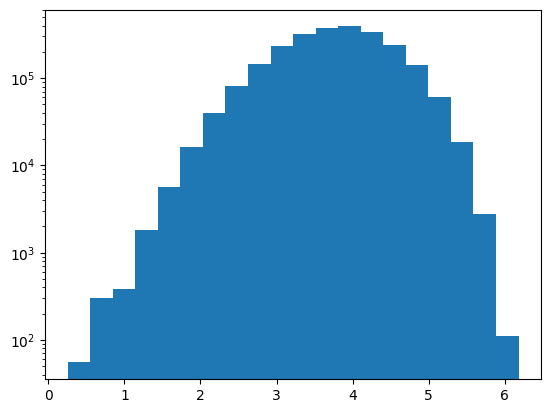

In [27]:
#a histogram of EvAll

plt.yscale("log")
plt.hist(EvAll, bins= 20)

plt.show()



#### Problem 2d: 
In fact, the histogram (2c) does not show all the possible binding sites in intergenic regions because the given sequences represent only the leading strand of DNA. To get the missing half, you can either:<br>
1) make a second data set by reverse complementing all intergenic sequence <br>
2) or by reverse complementing the energy matrix <br>(apply that to a new energy matrix by copy-pasting the code from 1c and modifying it as needed; hint: np.fliplr() and np.flipud might be useful). <br>Make a histogram as in 1c but now for all data.

In [28]:
#REVERSING THE INTERGENIC SEQUENCES 
from Bio.Seq import Seq
seq_igs=pd.read_csv(datafile,sep="\s+");
rows = seq_igs.shape[0]
reversed_seq_dataframe = pd.DataFrame()

reversed_list_Scer= []
reversed_list_Spar = []
reversed_list_Smik = []
reversed_list_Sbay = []
for n in range(0,rows):
    seq = Seq(seq_igs['Scer'][n])
    reversed_seq = str(seq.reverse_complement())
    reversed_list_Scer.append(reversed_seq)
        #if i == 'Spar' :
         #   reversed_list_Spar.append(reversed_seq)
        #if i == 'Smik':
         #   reversed_list_Smik.append(reversed_seq)
        #if i == 'Sbay':
        #    reversed_list_Sbay.append(reversed_seq)
        

reversed_seq_dataframe["Scer"] = reversed_list_Scer
#reversed_seq_dataframe["Spar"] = reversed_list_Spar
#reversed_seq_dataframe["Smik"] = reversed_list_Smik
#reversed_seq_dataframe["Sbay"] = reversed_list_Sbay



In [29]:
#calculting the values for the reversed sequence data 
rows= reversed_seq_dataframe.shape[0] 
columns = reversed_seq_dataframe.shape[1]
Eigs=[]
for n in range(0,rows): 
    for i in reversed_seq_dataframe.columns:
        seq=seq_igs['Scer'][n] 
        Eigs.append(getEnergy(seq,Emat)) 
                                     

EvAll_2=[val for sublist in Eigs for val in sublist]

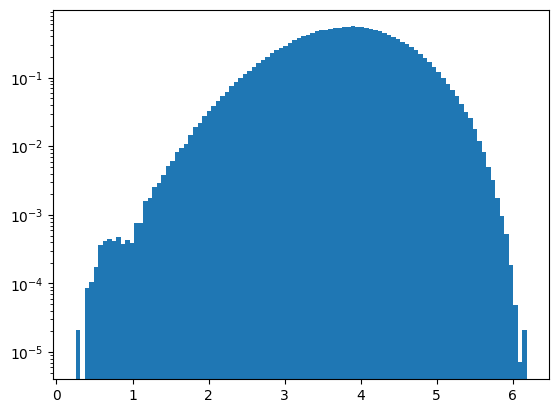

In [30]:
A = EvAll + EvAll_2

plt.yscale("log")

#plt.hist(EvAll, bins= 100)
#plt.hist(EvAll_2, bins= 100, alpha = 0.5)
plt.hist(A,bins= 100, density=True)

plt.show()

#### Problem 2e: 
Make a null model by permuting randomly each intergenic sequence using the function randomise() (i.e. copy the code from 2d and add one line with `randomise()`). Plot the counts from the null model together with the real data into a histogram. Comment on what you see. Where is selection visible?


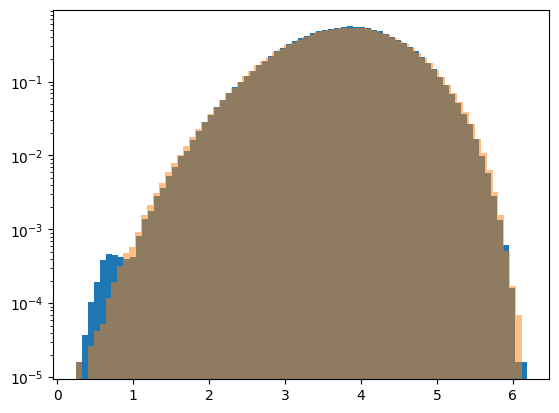

In [31]:
rows= reversed_seq_dataframe.shape[0] 
Eigs=[]
#creating the null model 
for n in range(0,rows): 
    seq=seq_igs['Scer'][n]
    seq_random = randomise(seq)
    Eigs.append(getEnergy(seq_random,Emat))
EvAll_random=[val for sublist in Eigs for val in sublist]    



plt.yscale("log")
plt.hist(A, bins= 75, density = True) #density set to true meaning the density adds up to 1 ? 
plt.hist(EvAll_random, bins= 75, alpha=0.5, density=True)
plt.show()

There with orange we see the null model and blue represents the real data from the Scer yeast sequence binding energy.
We can see that the null model is very close to the real data.
There is some parts that the null model used here can't tackle. This is due to the biological factors but could be reached using different null model. I am not quite sure what is meant with the question 'where is selection visible' but the differences between the null model and real data seem to be at the beginnig (values close to 0 on the y axis) and end (values close to 6 on the y-axis ), as well as some at the top of the graph. 